In [1]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [2]:
from fastai.text.all import *

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [51]:
# ! cp -r "/content/drive/My Drive/NLP_Project/data/jigsaw1_use_balanced.zip" .
# ! cp -r "/content/drive/My Drive/NLP_Project/data/jigsaw1_use_balanced_tok.zip" .
# ! mkdir "jigsaw1_use_balanced/models"
# ! cp -r "/content/drive/My Drive/NLP_Project/data/models/acc88_6.pth" "jigsaw1_use_balanced/models"
# ! unzip jigsaw1_use_balanced.zip
# ! unzip jigsaw1_use_balanced_tok.zip

# ! cp -r "/content/drive/My Drive/NLP_Project/data/jigsaw3.zip" .
# ! unzip jigsaw3.zip

Archive:  jigsaw3.zip
  inflating: comments_to_score.csv   
  inflating: sample_submission.csv   
  inflating: validation_data.csv     


In [3]:
data_path = Path("jigsaw1_use_balanced/")
dls = TextDataLoaders.from_folder(path=data_path,train='train', valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [6]:
learn.load("acc88_6")

SuggestedLRs(valley=0.00015848931798245758)

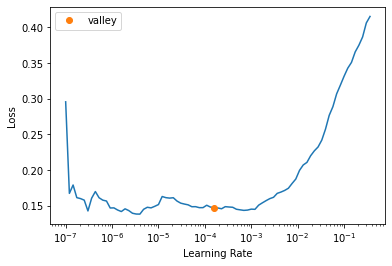

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(1, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.118936,0.480530,0.881227,01:26


epoch,train_loss,valid_loss,accuracy,time
0,0.116166,0.437216,0.886513,01:57


In [ ]:
learn.fine_tune(4, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.170823,0.394887,0.877783,01:03


epoch,train_loss,valid_loss,accuracy,time
0,0.169375,0.397712,0.877142,01:43
1,0.199163,0.393543,0.876181,01:45
2,0.164312,0.408314,0.877463,01:43
3,0.166045,0.397046,0.880586,01:44


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.161270,0.386932,0.881387,01:44
1,0.150634,0.399141,0.883069,01:44
2,0.132452,0.417661,0.885231,01:43
3,0.129382,0.403247,0.886112,01:44


In [ ]:
learn.save("acc88_6")
pickle.dump(dls.vocab, open("jigsaw1_lm.pickle", 'wb'))

In [ ]:
# ! zip -r jigsaw1_use_balanced_tok.zip jigsaw1_use_balanced_tok
# ! cp jigsaw1_use_balanced_tok.zip "/content/drive/My Drive/NLP_Project/data/"
# ! cp jigsaw1_lm.pickle "/content/drive/My Drive/NLP_Project/data/"
# ! cp -r "jigsaw1_use_balanced/models/acc88_6.pth" "/content/drive/My Drive/NLP_Project/data/models/"

In [ ]:
learn.predict("i hate men")

('toxic', TensorText(1), TensorText([0.0035, 0.9965]))

In [ ]:
! cp -r "/content/drive/My Drive/NLP_Project/data/jigsaw3.zip" .
! unzip jigsaw3.zip

Archive:  jigsaw3.zip
  inflating: comments_to_score.csv   
  inflating: sample_submission.csv   
  inflating: validation_data.csv     


# Batch Inference 

In [70]:
from tqdm import tqdm

test_data =  pd.read_csv("comments_to_score.csv")
comments_list = []
id_list = []
for index, row in tqdm(test_data.iterrows()):
  id_list.append(row['comment_id'])
  comments_list.append(row['text'])

test_dl = dls.test_dl(comments_list)
preds = learn.get_preds(dl=test_dl)

scores = preds[0].cpu().numpy()[:,1]
outfile = open("submission.csv",'w')
outfile.write("{},{}\n".format("comment_id", "score"))

for i in range(len(scores)):
  outfile.write("{},{}\n".format(id_list[i], scores[i]))
outfile.close() 


7537it [00:00, 13287.76it/s]


# Validation

In [ ]:
valid_data =  pd.read_csv("validation_data.csv")
less_toxic = []
more_toxic = []
for index, row in tqdm(valid_data.iterrows()):
  less_toxic.append(row['less_toxic'])
  more_toxic.append(row['more_toxic'])
all_comments = less_toxic+more_toxic

In [83]:
# Inference
test_dl = dls.test_dl(all_comments)
preds = learn.get_preds(dl=test_dl)

In [124]:
 # Score
scores = preds[0].cpu().numpy()[:,1]
less, more = np.split(scores, 2)
validation_score = (less<more).sum()/len(less)

 # Score random
np.random.seed(1)
scores = np.random.rand(valid_data.count()[0])
less, more = np.split(scores, 2)
validation_score_random = (less<more).sum()/len(less)

print("Validation score: {}\nValidation score random: {}".format(validation_score, validation_score_random))

Validation score: 0.6715823037066561
Validation score random: 0.500464992692972
